In [1]:
import pandas as pd

In [29]:
data = pd.read_csv("Credit_score.csv")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  int64  
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  int64  
 13  Credit_Mix                100000 non-null  ob

In [7]:
data.sample(5)

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Last_Loan_9,Last_Loan_8,Last_Loan_7,Last_Loan_6,Last_Loan_5,Last_Loan_4,Last_Loan_3,Last_Loan_2,Last_Loan_1,Credit_Score
13079,CUS_0x51d8,32,Journalist,77047.40,6711.616667,2,4,11.0,1,13,...,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Debt Consolidation Loan,Standard
44247,CUS_0x2c75,26,Accountant,168682.56,14118.880000,4,3,3.0,4,11,...,No Loan,No Loan,No Loan,No Loan,No Loan,Mortgage Loan,Mortgage Loan,Auto Loan,Auto Loan,Good
26809,CUS_0x8fa9,28,Media_Manager,28381.96,2236.163333,6,6,25.0,7,29,...,No Loan,No Loan,Home Equity Loan,Mortgage Loan,Home Equity Loan,Auto Loan,Student Loan,Not Specified,Mortgage Loan,Standard
44593,CUS_0x9394,35,Manager,31503.24,2911.270000,0,5,6.0,0,15,...,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Standard
86736,CUS_0xa6e8,18,Scientist,33349.63,2925.135833,4,1,3.0,2,12,...,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Home Equity Loan,Auto Loan,Good


In [9]:
data = data.dropna()

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'data' is your DataFrame

# Step 1: Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Step 2: Impute missing values
# For numeric columns, use mean strategy
imputer_numeric = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer_numeric.fit_transform(data[numeric_columns])

# For categorical columns, use the most frequent strategy
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer_categorical.fit_transform(data[categorical_columns])

# Step 3: Drop the Customer_ID column
data = data.drop('Customer_ID', axis=1)  # Drop the Customer_ID column

# Step 4: Split the data into features (X) and target (y)
X = data.drop('Credit_Score', axis=1)  # Replace 'Credit_Score' with your target column
y = data['Credit_Score']

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

# Step 7: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 8: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)

# Step 9: Make predictions and evaluate
y_pred = model.predict(X_test_pca)
accuracy_ = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 95.38%


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

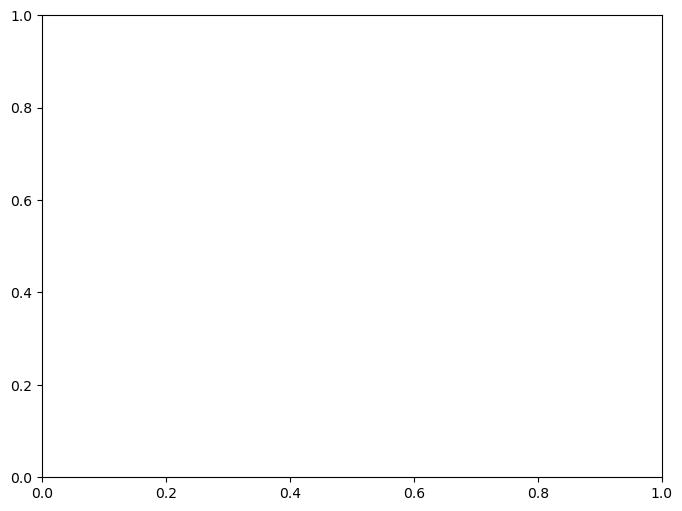

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a mesh grid with a larger step size to reduce points
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Predict the classification for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.coolwarm)

# Scatter plot of the PCA-transformed training data with smaller, transparent points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, edgecolors='k', s=50, cmap=plt.cm.coolwarm, alpha=0.7)

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Logistic Regression Decision Boundary (Accuracy: {accuracy:.2f})")

# Adjust legend
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()
